In [8]:
print("Hello world")

Hello world


In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, value=None, feature=None, threshold=None, left=None, right=None, label=None):
        self.value = value
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.label = label

def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

def information_gain(X, y, feature, threshold):
    left_mask = X[:, feature] <= threshold
    right_mask = ~left_mask
    left_entropy = entropy(y[left_mask])
    right_entropy = entropy(y[right_mask])
    total_entropy = entropy(y)
    gain = total_entropy - (left_entropy * sum(left_mask) / len(y) + right_entropy * sum(right_mask) / len(y))
    return gain

def find_best_split(X, y):
    num_features = X.shape[1]
    best_gain = 0
    best_feature = None
    best_threshold = None
    for feature in range(num_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            gain = information_gain(X, y, feature, threshold)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold
    return best_feature, best_threshold

def build_decision_tree(X, y, depth=0, max_depth=None):
    unique_classes = np.unique(y)
    if len(unique_classes) == 1:
        return Node(label=str(unique_classes[0]))
    if max_depth is not None and depth == max_depth:
        majority_class = str(np.argmax(np.bincount(y)))
        return Node(label=majority_class)
    best_feature, best_threshold = find_best_split(X, y)
    if best_feature is None:
        majority_class = str(np.argmax(np.bincount(y)))
        return Node(label=majority_class)
    left_mask = X[:, best_feature] <= best_threshold
    right_mask = ~left_mask
    left_subtree = build_decision_tree(X[left_mask], y[left_mask], depth + 1, max_depth)
    right_subtree = build_decision_tree(X[right_mask], y[right_mask], depth + 1, max_depth)
    return Node(value=X[0, best_feature], feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

def print_tree(node, depth=0):
    if node is None:
        return
    if node.label is not None:
        print(" " * depth * 4, f"Class: {node.label}")
    else:
        print(" " * depth * 4, f"Feature {node.feature} <= {node.threshold}")
        print_tree(node.left, depth + 1)
        print_tree(node.right, depth + 1)

# Load Iris dataset


In [32]:
import numpy as np
import pandas as pd

# Correct way to load a CSV file into a pandas DataFrame
df = pd.read_csv("purchase_.csv")  # Make sure the file path is correct

# Features and target variable
X = df[['Age', 'Salary']].values
y = df['PurchaseDecision'].values

# Assuming the rest of the decision tree code is unchanged, we proceed to build and print the tree
tree = build_decision_tree(X, y, max_depth=3)
print_tree(tree)


 Feature 1 <= 35258
     Class: 0
     Class: 1


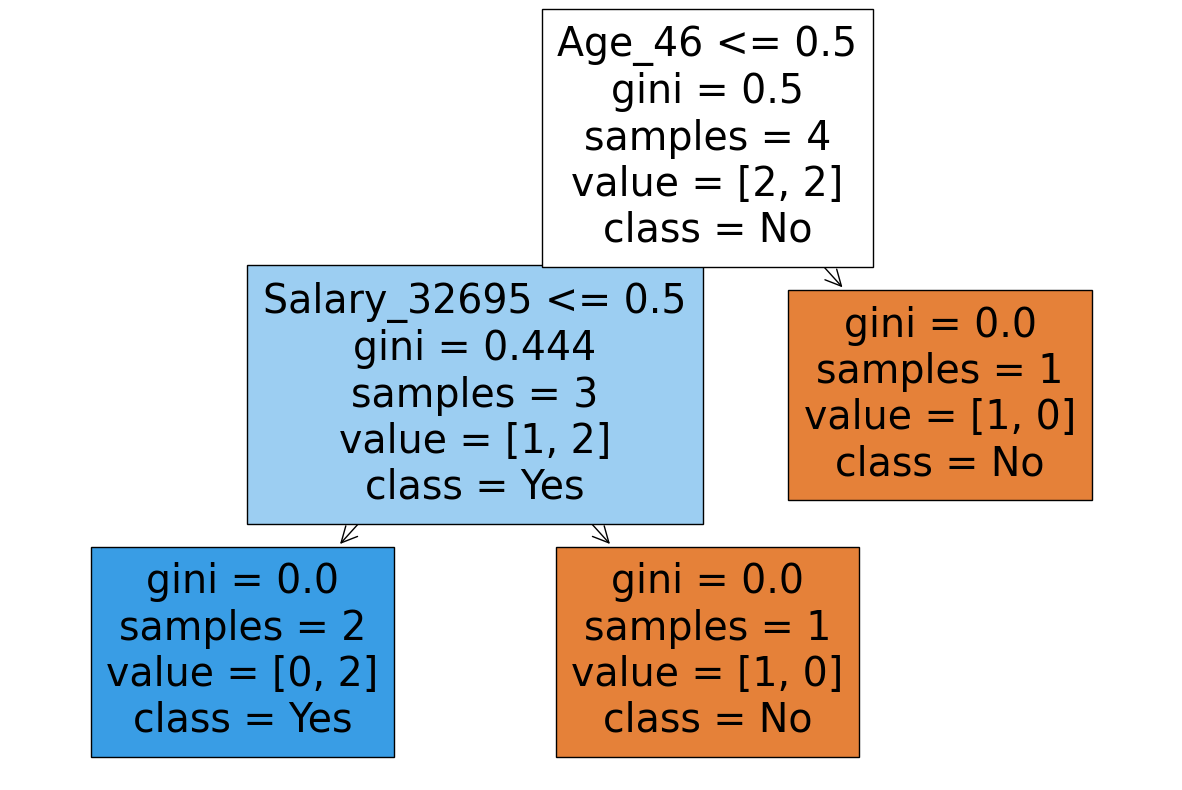

In [33]:
# One-hot encode categorical columns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

categorical_cols = ['Age','Salary']
encoder = OneHotEncoder()
transformed_data = encoder.fit_transform(df[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
transformed_df = pd.DataFrame(transformed_data.toarray(), columns=encoded_cols)

# Combine encoded data with original data
data_encoded = pd.concat([df.drop(columns=categorical_cols), transformed_df], axis=1)

# Fit decision tree classifier
X = data_encoded.drop('PurchaseDecision', axis=1)
y = data_encoded['PurchaseDecision']
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=data_encoded.columns[:-1], class_names=['No', 'Yes'])
plt.show()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH